# **Text Analysis in Python**

## **Basic Text Analysis**

**First, we install and import the necessary Python libraries.**

In [ ]:
!pip install bertopic[all]
!pip install gensim
!pip install keybert
!pip install wordcloud

In [44]:
import warnings
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from pprint import pprint
from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import pandas as pd
import sklearn
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

In [45]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [46]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**We define a function including some basic text preprocessing techniques.**

In [47]:
def preprocess(full_text):
    stop_words = stopwords.words('english')
    text = full_text.lower()
    words = word_tokenize(text)
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]
    filtered_words = [word for word in words if word not in stop_words]
    filtered_words = [word for word in filtered_words if len(word) > 2]
    lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]
    lemmas = [word for word in lemmas if len(word) > 2]
    text = " ".join(lemmas)
    return text

**Import the dataset**. The dataset can be found [here](https://huggingface.co/datasets/tasosk/airlines/viewer/tasosk--airlines/validation). We keep the text column.

In [48]:
data = pd.read_csv("dev.csv")
df = data.text
df.head(15)

0       Luton to Zurich. On arrival at the gate I fo...
1     Rating : 0/10 Cabin Flown Economy Value for Mo...
2       My aunt (89) was booked to take this domesti...
3      As always I had a great experience flying Ind...
4     Delayed for almost 20 hours without food water...
5     We travelled from Marrakech to Gatwick on Sund...
6     Birmingham to Hamburg with Eurowings. For the ...
7       Bagdogra to Delhi. Check-in slightly chaotic...
8      This is the worst airline we ever flew with. ...
9     Bangkok-Chiang Mai Chiang Mai-Phuket Krabi-Ban...
10     Kuala Lumpur to Surabaya with AirAsia. Above ...
11    Flew MEL - Darwin on JQ61 which then continues...
12      Melbourne to Tokyo via Gold Coast. Appalling...
13    Nov 4 2013. Route: HYD-BLR. I have been a freq...
14    LGW-VCE PSA-LGW. Both flights on time and oper...
Name: text, dtype: object

**Apply preprocessing.**

In [49]:
df = df.astype(str).apply(preprocess)
df.head(15)

0     luton zurich arrival gate found long queue roo...
1     rating cabin flown economy value money seat co...
2     aunt booked take domestic flight auckland nels...
3     always great experience flying indigo quick on...
4     delayed almost hour without food water accommo...
5     travelled marrakech gatwick sunday january fli...
6     birmingham hamburg eurowings money paid get ha...
7     bagdogra delhi checkin slightly chaotic ixb fl...
8     worst airline ever flew first flight hour late...
9     bangkokchiang mai chiang maiphuket krabibangko...
10    kuala lumpur surabaya airasia expectation seat...
11    flew mel darwin continues singapore sign bad s...
12    melbourne tokyo via gold coast appalling exper...
13    nov route hydblr frequent flyer indigo year ai...
14    lgwvce psalgw flight time operated clean quiet...
Name: text, dtype: object

**Word frequencies**

In [50]:
text = ' '.join(df.values)
tokens = word_tokenize(text)
freqs = FreqDist(tokens).most_common(100)
df_freq = pd.DataFrame(freqs, columns=['Word','Count'])
df_freq.head(30)

,Word,Count
0,flight,1181
1,time,364
2,seat,325
3,airline,299
4,hour,267
5,easyjet,237
6,staff,235
7,service,235
8,crew,234
9,would,229


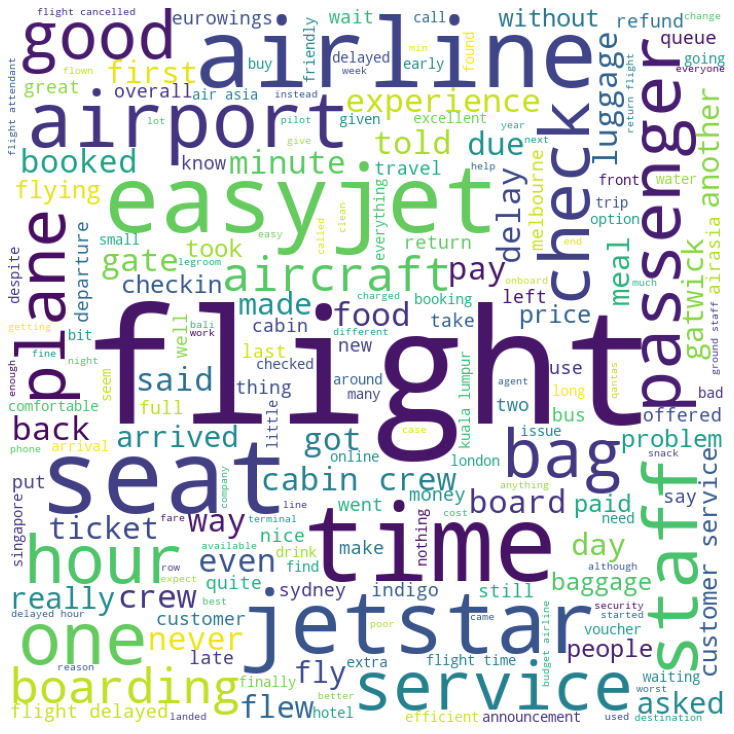

In [51]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Bigram frequencies**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(ngram_range=(2,3))
bgrams = c_vec.fit_transform(df)
count_values = bgrams.toarray().sum(axis=0)
vocab = c_vec.vocabulary_
df_bgram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'Bigram'}).set_index('Bigram').iloc[:,:20]
df_bgram.iloc[:15,:]

,frequency
Bigram,
cabin crew,90
customer service,70
flight delayed,62
flight time,47
kuala lumpur,43
air asia,39
flight cancelled,36
delayed hour,36
return flight,33


**Trigram frequencies**

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(ngram_range=(3,3))
ngrams = c_vec.fit_transform(df)
count_values = ngrams.toarray().sum(axis=0)
vocab = c_vec.vocabulary_
df_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'bigram/trigram'}).set_index('bigram/trigram').iloc[:,:20]
df_trigram.iloc[:15,:]

,frequency
bigram/trigram,
flight delayed hour,12
low cost carrier,10
low cost airline,9
never fly jetstar,8
full service airline,8
flight departed time,8
exit row seat,8
poor customer service,7
air traffic control,7


**Keyword extraction**

We will use **keyBERT** technique for *Keyword Extraction*.

In [54]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')
keywords = kw_model.extract_keywords(text,
                                     keyphrase_ngram_range=(1,1), 
                                     stop_words='english', 
                                    use_maxsum=True, 
                                     nr_candidates=20, 
                                     top_n=15)

In [55]:
keywords

[('airasia', 0.3826),
 ('baggage', 0.3839),
 ('airportsecurity', 0.3864),
 ('hospitality', 0.3877),
 ('rebooking', 0.3878),
 ('accomodation', 0.3892),
 ('aeroplane', 0.3897),
 ('airport', 0.3934),
 ('westjet', 0.4009),
 ('flight', 0.4058),
 ('ryanair', 0.4127),
 ('lufthansa', 0.4178),
 ('eastjet', 0.4451),
 ('ticketing', 0.4645),
 ('spicejet', 0.4847)]

## **Topic Modelling**

### **Latent Dirichlet Allocation (LDA)**

In [56]:
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint

corpus = [word_tokenize(text) for text in df.values]
id2word = corpora.Dictionary(corpus)
doc_term_matrix  = [id2word.doc2bow(text) for text in corpus]
ldamod = LdaModel(doc_term_matrix, 
                  id2word = id2word, 
                   passes = 5, random_state = 42)
pprint(ldamod.print_topics())


[(41,
  '0.038*"flight" + 0.015*"business" + 0.013*"voucher" + 0.013*"could" + '
  '0.012*"even" + 0.010*"cabin" + 0.010*"first" + 0.010*"passenger" + '
  '0.010*"onboard" + 0.009*"company"'),
 (91,
  '0.035*"jetstar" + 0.021*"melbourne" + 0.017*"flight" + 0.015*"qantas" + '
  '0.013*"sydney" + 0.011*"luggage" + 0.010*"fly" + 0.010*"pay" + 0.010*"kept" '
  '+ 0.009*"given"'),
 (72,
  '0.037*"really" + 0.030*"flight" + 0.022*"customer" + 0.022*"time" + '
  '0.022*"jetstar" + 0.015*"ground" + 0.015*"staff" + 0.015*"service" + '
  '0.015*"cancelled" + 0.008*"said"'),
 (56,
  '0.026*"delayed" + 0.022*"flight" + 0.017*"would" + 0.016*"boarding" + '
  '0.015*"easyjet" + 0.013*"voucher" + 0.013*"refund" + 0.012*"passenger" + '
  '0.012*"wife" + 0.009*"needed"'),
 (84,
  '0.023*"flight" + 0.020*"well" + 0.015*"refund" + 0.010*"asia" + '
  '0.010*"service" + 0.010*"customer" + 0.010*"cancel" + 0.010*"use" + '
  '0.010*"would" + 0.010*"wheelchair"'),
 (73,
  '0.030*"still" + 0.021*"flight" + 0.0

### **BERTopic**

In [57]:
from bertopic import BERTopic

docs = list(df.values)
model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")
topics,probabilities = model.fit_transform(docs)
pprint(model.get_topic_freq().head(5))

   Topic  Count
0     -1    231
1      0     66
2      1     53
3      2     53
4      3     42


In [58]:
model.get_topic_info().head(10)

,Topic,Count,Name
0,-1,231,-1_flight_seat_time_easyjet
1,0,66,0_flight_cancelled_refund_hour
2,1,53,1_flight_seat_food_meal
3,2,53,2_crew_flight_friendly_time
4,3,42,3_jetstar_flight_melbourne_sydney
5,4,32,4_bag_baggage_flight_luggage
6,5,22,5_flight_seat_boarding_good
7,6,21,6_eurowings_flight_zurich_easyjet
8,7,15,7_easyjet_flight_passport_airport
9,8,15,8_easyjet_flight_aircraft_gatwick


## **Sentiment Analysis**

In [59]:
from textblob import TextBlob

polarity, subjectivity = list(), list()

for sentence in docs:
  polarity.append(TextBlob(sentence).sentiment.polarity)
  subjectivity.append(TextBlob(sentence).sentiment.subjectivity)

print('Polarity: {} ({})'.format(round(np.mean(polarity),3),round(np.std(polarity),3)))
print('Subjectivity: {} ({})'.format(round(np.mean(subjectivity),3),round(np.std(subjectivity),3)))


Polarity: 0.097 (0.237)
Subjectivity: 0.5 (0.151)
